# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Problem statement
* You have been given a dataset that describes the houses in Boston.Now,based on the given features,you have to predict the house price.

# Creating a DataFrame

In [2]:
boston=load_boston()
df=pd.DataFrame(boston.data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# EDA-Exploratory Data Analysis
* Turning raw data into relevant data to apply ml alg


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Adding columnns

In [4]:
df.columns=boston.feature_names

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33



# Column Information

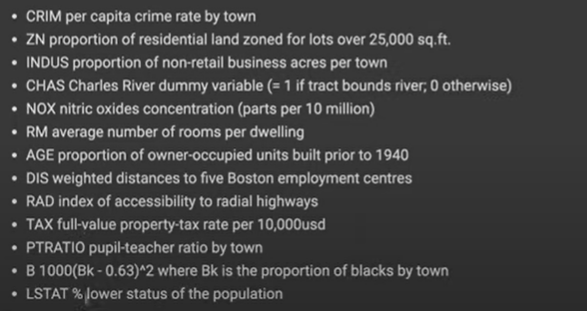

# Adding target column into the DataFrame

In [6]:
df['PRICE']=boston.target

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [9]:
df.shape

(506, 14)

In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [11]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [12]:
#to check the unique values
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.corr

<bound method DataFrame.corr of         CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.9

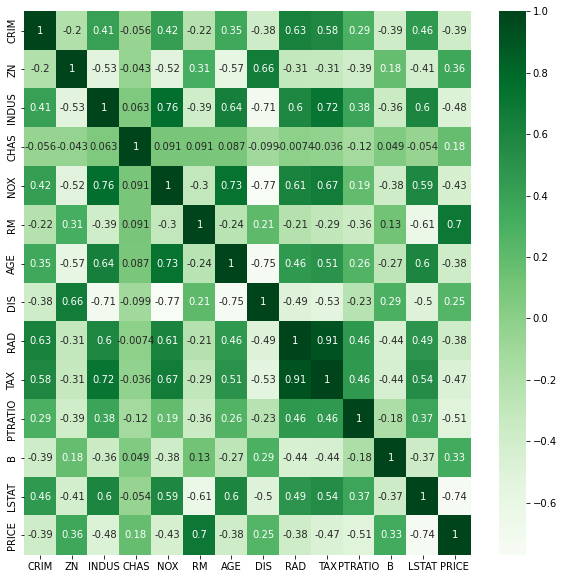

In [16]:

plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True,cmap='Greens')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


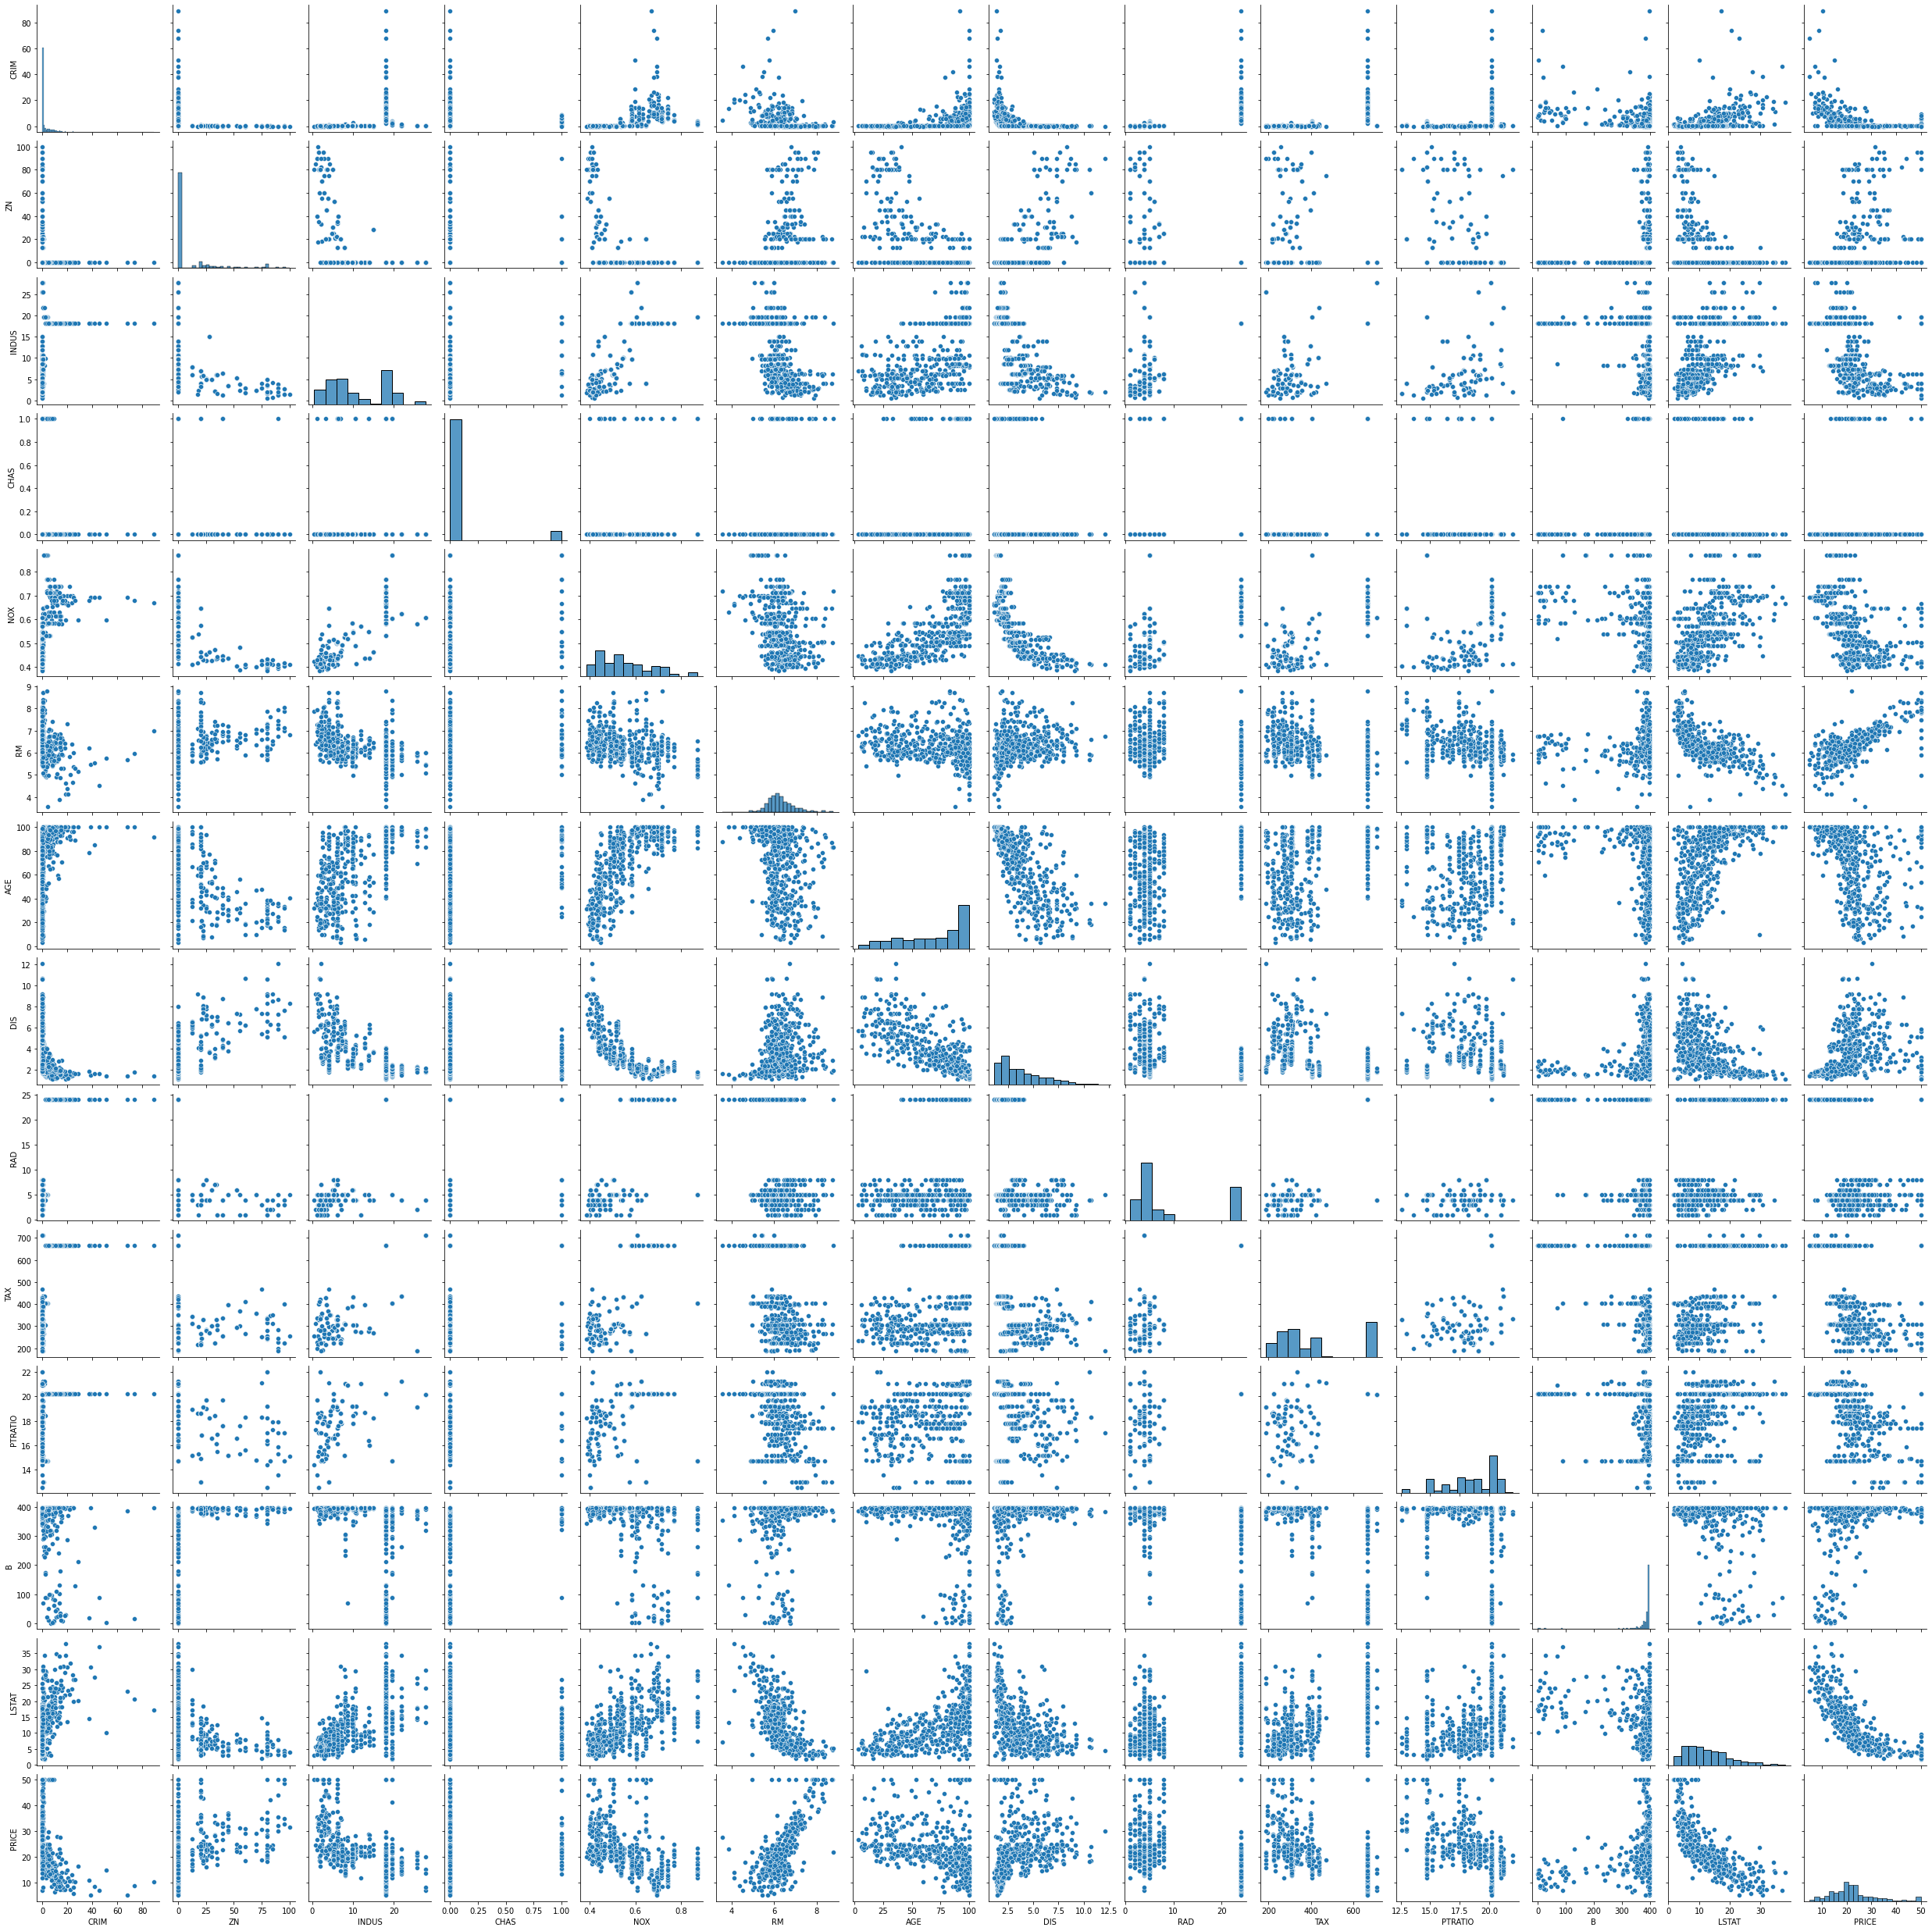

In [17]:
#pairplot
sns.pairplot(df,size=2.5)

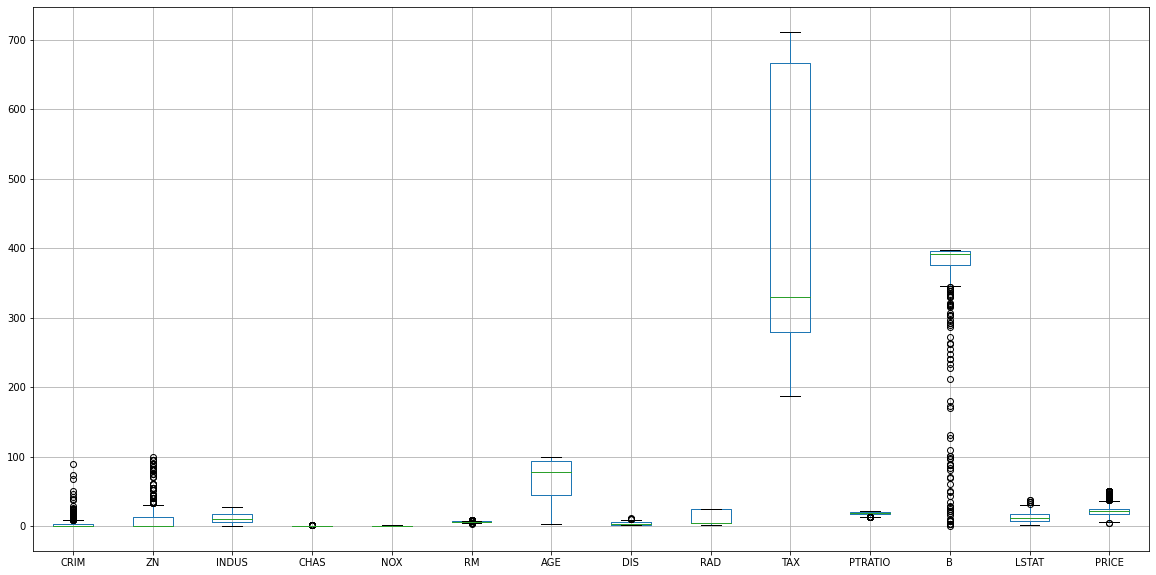

In [18]:
#Box plot
plt.figure(figsize=(20,10))
df.boxplot()


In [19]:
#Minimum price
df.PRICE.min()

5.0

In [20]:
#maximum price
df.PRICE.max()

50.0

In [21]:
df.PRICE.std()

9.19710408737982

# Exploring the dataset

In [22]:
df.to_csv('boston_dataset.csv')

# Machine Learning- Linear Regression

In [23]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
x=np.array(df.drop('PRICE',axis=1))
y=np.array(df.PRICE)

#x=boston.data
#y=boston.target

In [25]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [26]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Splitting the data 

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
len(x_train)

404

In [29]:
len(y_train)

404

In [30]:
len(x_test)

102

In [31]:
len(y_test)

102

# Choosing the model

In [32]:
model=LinearRegression()

# Fitting/Training the model 

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [34]:
#intercept value
model.intercept_

42.93352585337652

In [35]:
#coefficient value
model.coef_

array([-1.12386867e-01,  5.80587074e-02,  1.83593559e-02,  2.12997760e+00,
       -1.95811012e+01,  3.09546166e+00,  4.45265228e-03, -1.50047624e+00,
        3.05358969e-01, -1.11230879e-02, -9.89007562e-01,  7.32130017e-03,
       -5.44644997e-01])

# Predicting or testing the model

In [36]:
x_test

array([[4.93200e-02, 3.30000e+01, 2.18000e+00, ..., 1.84000e+01,
        3.96900e+02, 7.53000e+00],
       [2.54300e-02, 5.50000e+01, 3.78000e+00, ..., 1.76000e+01,
        3.96900e+02, 7.18000e+00],
       [2.29270e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.92740e+02, 1.88000e+01],
       ...,
       [1.07930e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        3.93490e+02, 1.30000e+01],
       [1.22472e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.46500e+01, 1.56900e+01],
       [9.96654e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.86730e+02, 1.88500e+01]])

In [37]:
y_test

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6, 23.7,
       31.2, 19.3, 19.4, 19.4, 27.9, 13.9, 50. , 24.1, 14.6, 16.2, 15.6,
       23.8, 25. , 23.5,  8.3, 13.5, 17.5, 43.1, 11.5, 24.1, 18.5, 50. ,
       12.6, 19.8, 24.5, 14.9, 36.2, 11.9, 19.1, 22.6, 20.7, 30.1, 13.3,
       14.6,  8.4, 50. , 12.7, 25. , 18.6, 29.8, 22.2, 28.7, 23.8,  8.1,
       22.2,  6.3, 22.1, 17.5, 48.3, 16.7, 26.6,  8.5, 14.5, 23.7, 37.2,
       41.7, 16.5, 21.7, 22.7, 23. , 10.5, 21.9, 21. , 20.4, 21.8, 50. ,
       22. , 23.3, 37.3, 18. , 19.2, 34.9, 13.4, 22.9, 22.5, 13. , 24.6,
       18.3, 18.1, 23.9, 50. , 13.6, 22.9, 10.9, 18.9, 22.4, 22.9, 44.8,
       21.7, 10.2, 15.4])

In [38]:
y_pred=model.predict(x_test)

In [39]:
y_pred

array([32.65503184, 28.0934953 , 18.02901829, 21.47671576, 18.8254387 ,
       19.87997758, 32.42014863, 18.06597765, 24.42277848, 27.00977832,
       27.04081017, 28.75196794, 21.15677699, 26.85200196, 23.38835945,
       20.66241266, 17.33082198, 38.24813601, 30.50550873,  8.74436733,
       20.80203902, 16.26328126, 25.21805656, 24.85175752, 31.384365  ,
       10.71311063, 13.80434635, 16.65930389, 36.52625779, 14.66750528,
       21.12114902, 13.95558618, 43.16210242, 17.97539649, 21.80116017,
       20.58294808, 17.59938821, 27.2212319 ,  9.46139365, 19.82963781,
       24.30751863, 21.18528812, 29.57235682, 16.3431752 , 19.31483171,
       14.56343172, 39.20885479, 18.10887551, 25.91223267, 20.33018802,
       25.16282007, 24.42921237, 25.07123258, 26.6603279 ,  4.56151258,
       24.0818735 , 10.88682673, 26.88926656, 16.85598381, 35.88704363,
       19.55733853, 27.51928921, 16.58436103, 18.77551029, 11.13872875,
       32.36392607, 36.72833773, 21.95924582, 24.57949647, 25.14

# Testing the model performance

In [40]:
model.score(x_test,y_test)

0.7634174432138495

In [41]:
#R square
r2_score(y_test,y_pred)

0.7634174432138495

In [42]:
#Adjusted R squared


In [43]:
#MSE
mean_squared_error(y_test,y_pred)

23.38083648026999

In [44]:
#MAE
mean_absolute_error(y_test,y_pred)

3.7507121808389092

In [45]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

4.835373458200514

Text(0.5, 1.0, 'Actual vs Predicted price')

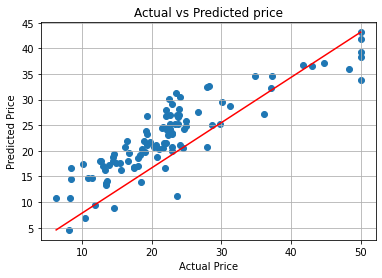

In [46]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red')
plt.title('Actual vs Predicted price')

# Klib library

In [47]:
!pip install klib

In [55]:
import klib
from sklearn.datasets import load_diabetes,load_iris

In [49]:
df=pd.DataFrame(load_diabetes().data)

In [50]:
df.columns=load_diabetes().feature_names

In [51]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


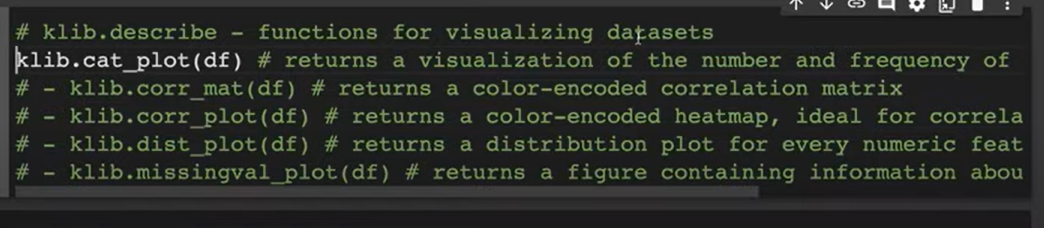

In [53]:
klib.cat_plot(df)

No columns with categorical data were detected.


In [56]:
df=pd.DataFrame(load_iris().data)

In [58]:
df.columns=load_iris().feature_names

In [59]:
df['Cat']=load_iris().target

In [60]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cat
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [61]:
df=pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


GridSpec(6, 5)

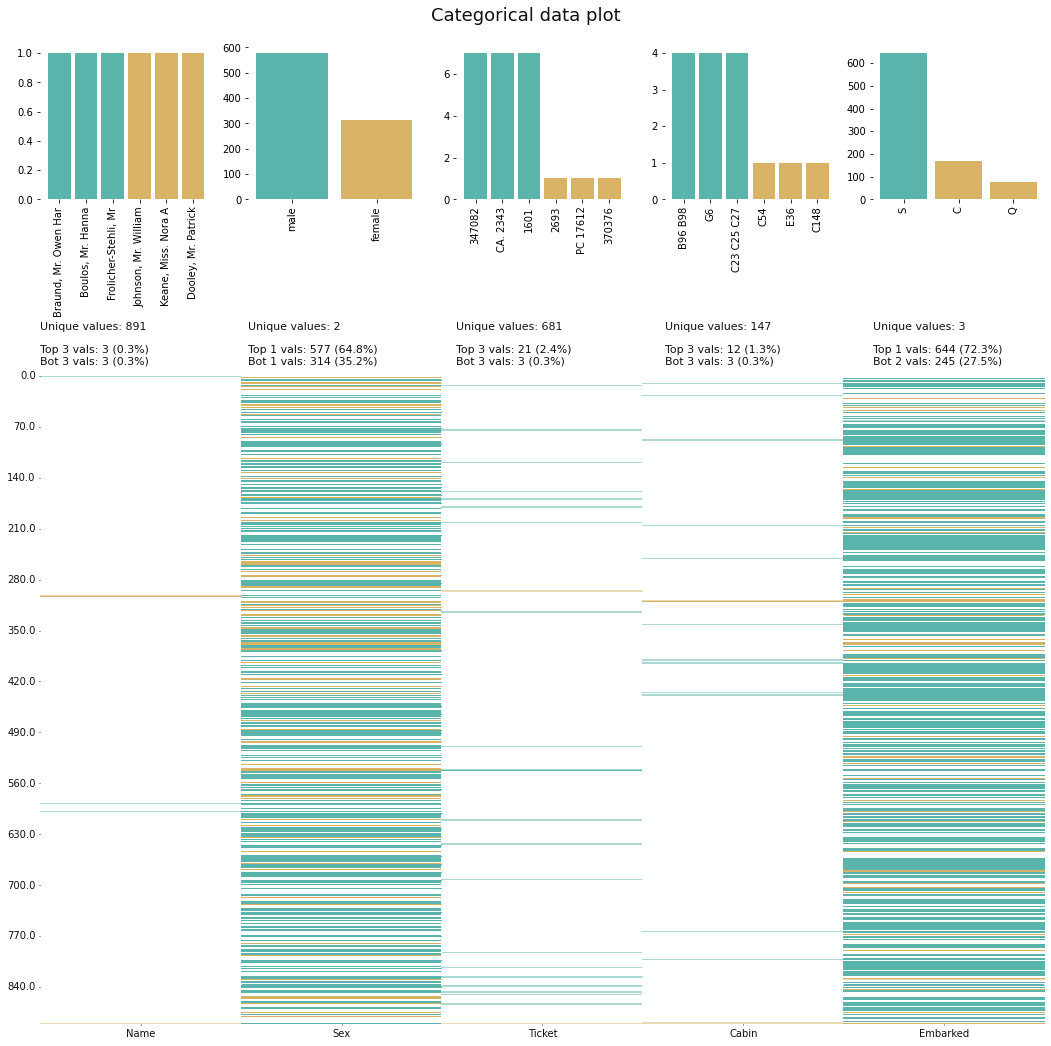

In [63]:
klib.cat_plot(df)

In [64]:
klib.corr_mat(df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


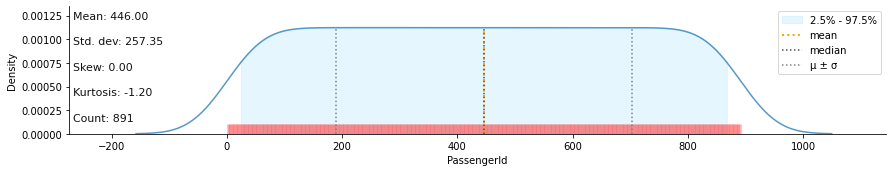

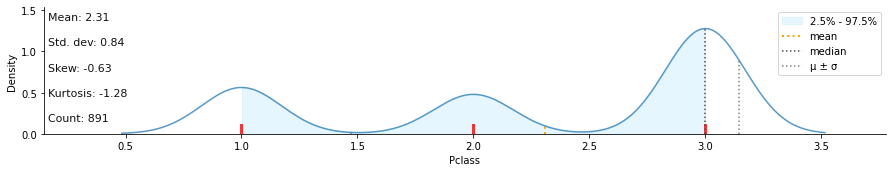

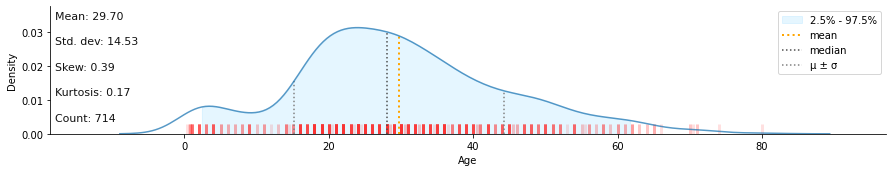

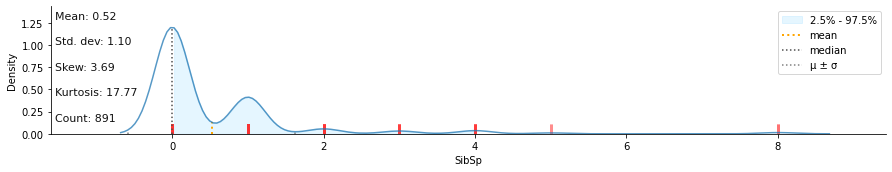

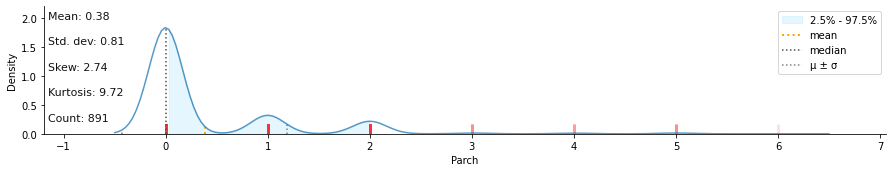

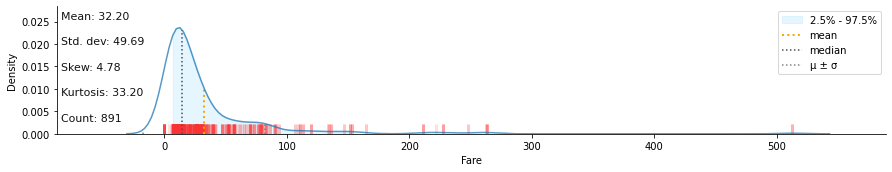

In [65]:
klib.dist_plot(df)

GridSpec(6, 6)

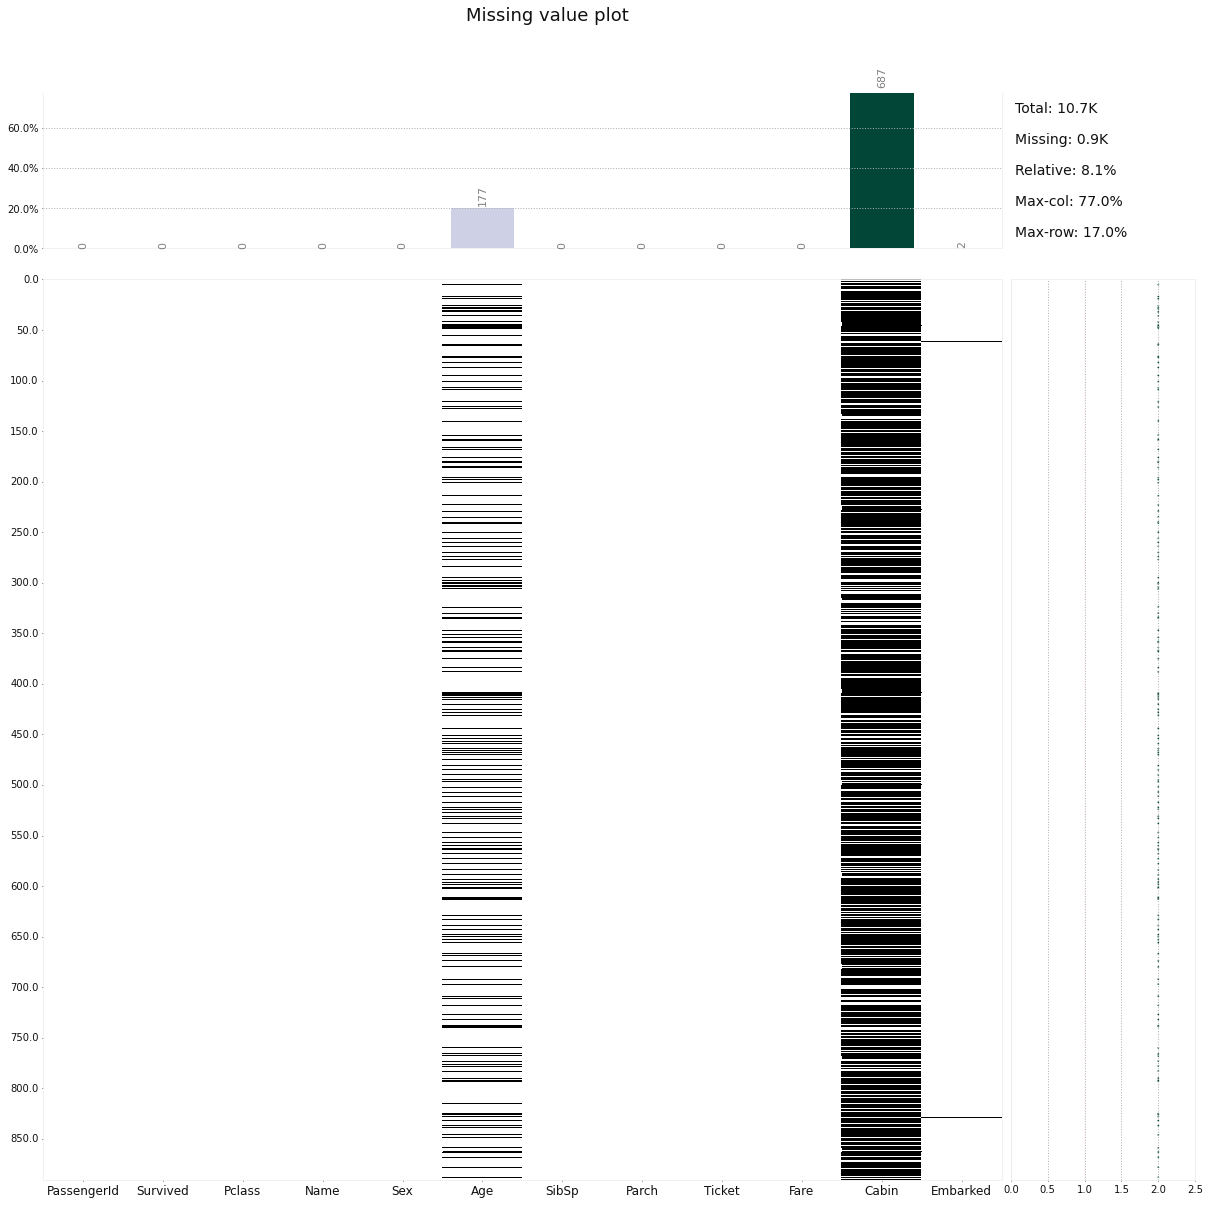

In [66]:
klib.missingval_plot(df)

https://pypi.org/project/klib/

klib.clean - functions for cleaning datasets
- klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
- klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()
- klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
- klib.drop_missing(df) # drops missing values, also called in data_cleaning()
- klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content
- klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information


In [67]:
klib.data_cleaning(df)

Shape of cleaned data: (891, 12)Remaining NAs: 866

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-50.0%)



,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,<NA>,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283302,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,<NA>,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,<NA>,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,<NA>,1,2,W./C. 6607,23.450001,<NA>,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


GridSpec(6, 6)

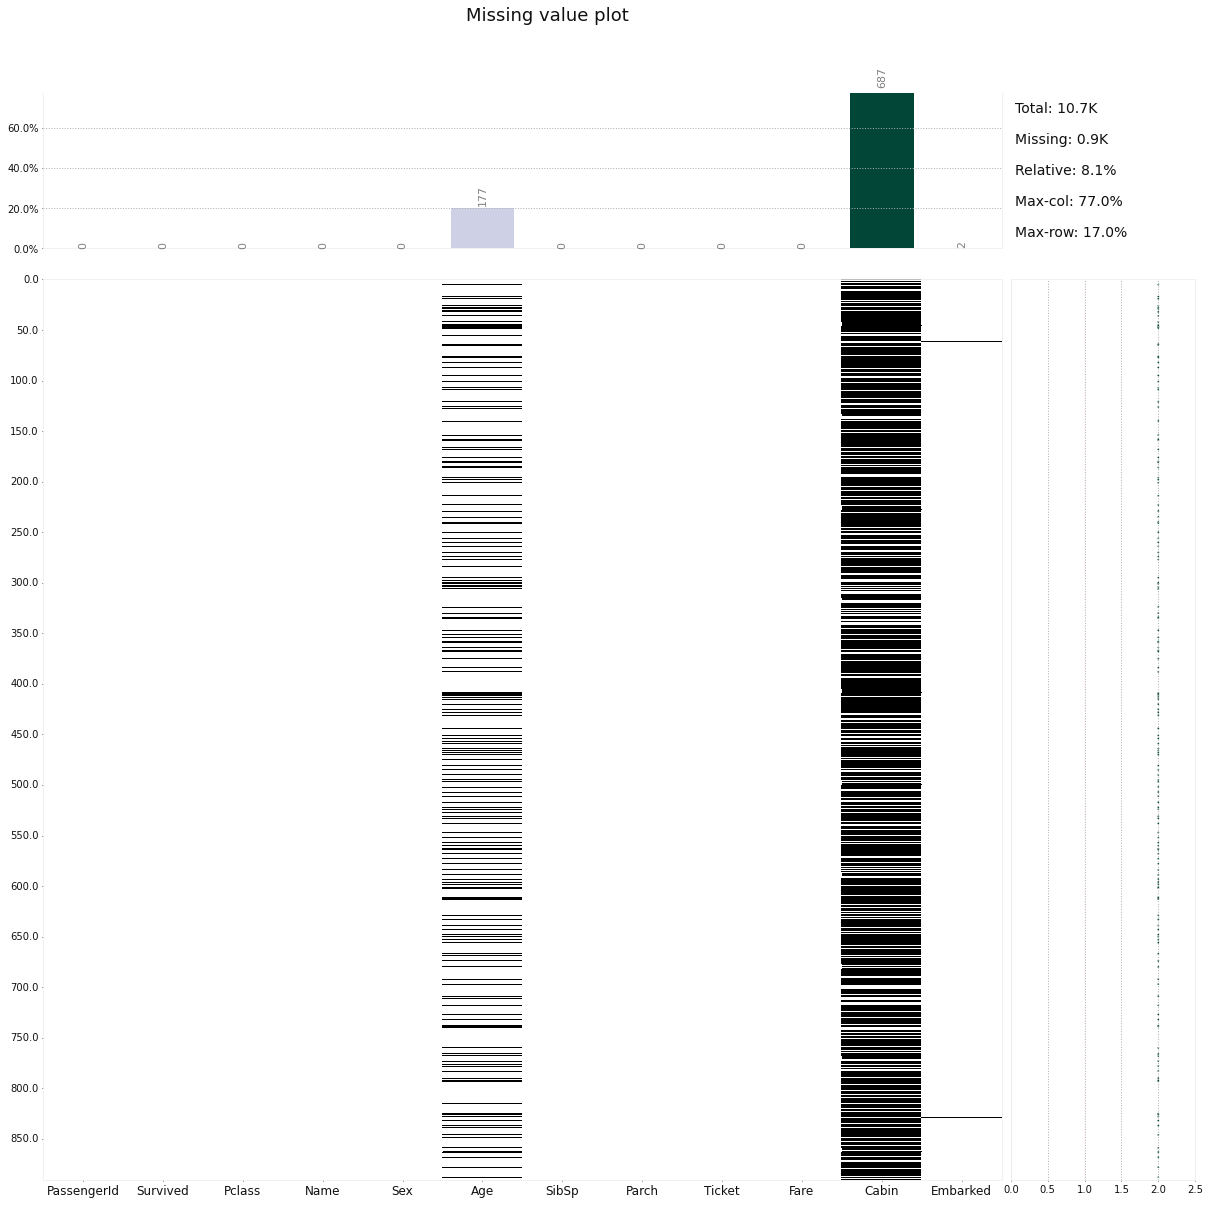

In [68]:
klib.missingval_plot(df)